In [1258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import sklearn.metrics  

In [1259]:
df1 = pd.read_csv('Summary of Weather.csv')
df1.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1260]:
df1.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [1261]:
df2 = pd.read_csv('Weather Station Locations.csv')
df2.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [1262]:
df2.rename(columns = {'WBAN':'STA'}, inplace = True)

In [1263]:
df2.drop(columns=['LAT', 'LON', 'ELEV', 'Latitude', 'Longitude', 'STATE/COUNTRY ID'])

,STA,NAME
0,33013,AIN EL
1,33031,LA SENIA
2,33023,MAISON BLANCHE
3,33044,TELERGMA
4,12001,TINDOUF
...,...,...
156,33109,EL AQUINA
157,33121,EL DJEM
158,33003,SISI AHMED
159,33307,ADANA


In [1264]:
df = pd.merge(df1, df2, on='STA', how='inner')
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACCRA,GH,0536N,00010W,62,5.6,-0.3
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACCRA,GH,0536N,00010W,62,5.6,-0.3
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACCRA,GH,0536N,00010W,62,5.6,-0.3
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACCRA,GH,0536N,00010W,62,5.6,-0.3
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACCRA,GH,0536N,00010W,62,5.6,-0.3


In [1265]:
df.shape

(119040, 38)

In [1266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119040 entries, 0 to 119039
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   STA               119040 non-null  int64  
 1   Date              119040 non-null  object 
 2   Precip            119040 non-null  object 
 3   WindGustSpd       532 non-null     float64
 4   MaxTemp           119040 non-null  float64
 5   MinTemp           119040 non-null  float64
 6   MeanTemp          119040 non-null  float64
 7   Snowfall          117877 non-null  object 
 8   PoorWeather       34237 non-null   object 
 9   YR                119040 non-null  int64  
 10  MO                119040 non-null  int64  
 11  DA                119040 non-null  int64  
 12  PRCP              117108 non-null  object 
 13  DR                533 non-null     float64
 14  SPD               532 non-null     float64
 15  MAX               118566 non-null  float64
 16  MIN               11

In [1267]:
df.isnull().sum()

STA                      0
Date                     0
Precip                   0
WindGustSpd         118508
MaxTemp                  0
MinTemp                  0
MeanTemp                 0
Snowfall              1163
PoorWeather          84803
YR                       0
MO                       0
DA                       0
PRCP                  1932
DR                  118507
SPD                 118508
MAX                    474
MIN                    468
MEA                    498
SNF                   1163
SND                 113477
FT                  119040
FB                  119040
FTI                 119040
ITH                 119040
PGT                 118515
TSHDSBRSGF           84803
SD3                 119040
RHX                 119040
RHN                 119040
RVG                 119040
WTE                 119040
NAME                     0
STATE/COUNTRY ID         0
LAT                      0
LON                      0
ELEV                     0
Latitude                 0
L

In [1268]:
df = df.drop(columns = ['WindGustSpd', 'DR', 'SPD', 'SND', 'FT', 'FB', 'FTI', 'ITH', 'PGT', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE', 'PoorWeather', 'STA'])
df = df.drop(columns=[ 'TSHDSBRSGF', 'SNF', 'MAX', 'MIN', 'MEA', 'Date', 'Precip', 'PRCP', 'Snowfall'])
df = df.drop(columns = ['NAME','LAT', 'LON', 'ELEV', 'Latitude', 'Longitude', 'STATE/COUNTRY ID','YR', 'DA', 'MO'])
df.shape

(119040, 3)

In [1269]:
df.head()

,MaxTemp,MinTemp,MeanTemp
0,25.555556,22.222222,23.888889
1,28.888889,21.666667,25.555556
2,26.111111,22.222222,24.444444
3,26.666667,22.222222,24.444444
4,26.666667,21.666667,24.444444


In [1270]:
df.isnull().sum()

MaxTemp     0
MinTemp     0
MeanTemp    0
dtype: int64

In [1271]:
#df['PRCP'] = df['PRCP'].fillna(df["PRCP"].mode()[0])

In [1272]:
#df['Snowfall'] = df['Snowfall'].fillna(df["Snowfall"].mode()[0])

In [1273]:
df.isnull().sum()

MaxTemp     0
MinTemp     0
MeanTemp    0
dtype: int64

In [1274]:
df['MaxTemp'].corr(df['MinTemp'])

0.8783839059497562

In [1275]:
corr = df.corr()

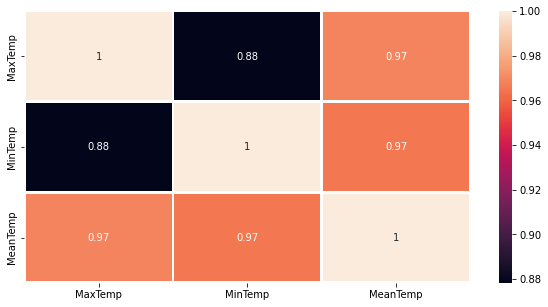

In [1276]:
plt.figure(figsize = (10,5))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, linewidths=2, annot=True)

In [1277]:
df = pd.get_dummies(df)

In [1278]:
df.head()

,MaxTemp,MinTemp,MeanTemp
0,25.555556,22.222222,23.888889
1,28.888889,21.666667,25.555556
2,26.111111,22.222222,24.444444
3,26.666667,22.222222,24.444444
4,26.666667,21.666667,24.444444


In [1279]:
x = df.drop(columns=['MaxTemp'])
y = df['MaxTemp']

print(x.shape)
print(y.shape)

(119040, 2)
(119040,)


In [1280]:
x, x_test, y, y_test = train_test_split(x_test,y_test,test_size=0.2,train_size=0.8)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.5,train_size =0.5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x_cv.shape)
print(y_cv.shape)

(468, 2)
(235, 2)
(468,)
(235,)
(468, 2)
(468,)


In [1281]:
import statsmodels.api as sm

model = sm.OLS(y_train, x_train).fit()

In [1282]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                MaxTemp   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.123e+06
Date:                Sun, 20 Feb 2022   Prob (F-statistic):                        0.00
Time:                        06:02:04   Log-Likelihood:                         -248.59
No. Observations:                 468   AIC:                                      501.2
Df Residuals:                     466   BIC:                                      509.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [1283]:
pred = model.predict(x_test)

data = list(zip(y_test, pred))

In [1284]:
comptab = pd.DataFrame(data, columns=['Actual', 'Predicted'])
comptab.head()

,Actual,Predicted
0,28.888889,29.454408
1,26.111111,25.564198
2,28.888889,28.898715
3,28.888889,28.898683
4,-8.888889,-8.891824


In [1285]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, pred))
print(rmse)

0.4132287401507269


In [1288]:
import pickle

In [1289]:
with open('WWII.pickle', 'wb') as handle:
  pickle.dump(model, handle, protocol = pickle.HIGHEST_PROTOCOL)

with open('WWII.pickle', 'rb') as handle:
  h = pickle.load(handle)